<a href="https://colab.research.google.com/github/VaradiRambabu/EDA-on-Airnbn-Bookings-/blob/main/Airbnb_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>











## Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. 



In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#importing the libraries
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
#loading the data
path = '/content/drive/MyDrive/Colab Notebooks/EDA Project/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#knowing the shape of the data
df.shape

(48895, 16)

In [ ]:
#getting the columns present
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#checking the non null values and the data type of columns present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     


## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 


##  Now we are going to Explore and analyze the data to discover key understandings



*   locating the neighbourhood group in the map
*  Difference of traffic among different areas
*   Analysing different hosts and areas 
*   List item
* predictions based on host,neighbourhood group, prices, reviews
*   Corelation among the different columns of the data using heat map
*  Busiest host based on minimum stay of customers
* busiest host based on the number of host listings  and minimum stay of customers
*  Analysing different hosts and areas 
*   Types of rooms present in different neighbourhood group




# **DATA FEATURES**

*  id: listing ID 


*  name: name of the listing

*   host_id: host ID
*   host_name: name of the host


*    neighbourhood_group: location



*   neighbourhood: area




*  latitude: latitude coordinates
*  longitude: longitude coordinates



*   room_type: type of the room 
*   price: price in dollars

*   minimum_nights: minimum nights stayed

*  number_of_reviews: number of reviews

*   last_review: latest review
*   reviews_per_month: number of reviews per month


*  calculated_host_listings_count: amount of listing per host


*  availability_365: number of days when listing is available for 



## DATA CLEANING

In [ ]:
#finding and counting null values 
df.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#replacing the null values 
df.fillna({'last_review':0,'reviews_per_month':0,'host_name':False,'name':False},inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#dropping the columns which we don't want to use
df1=df.drop(['id','host_id','longitude','last_review','reviews_per_month'],axis = 1)
df1.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#descriptive statistics for numerical values
df1.describe()

,latitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
#checking for duplicate values
print(np.sum(df1.duplicated()))

0


## EXPLORING THE DATA WITH DATA VISUALIZATION

## **Locating the neighbourhood groups in the map using latitudes and longitudes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group Location ')

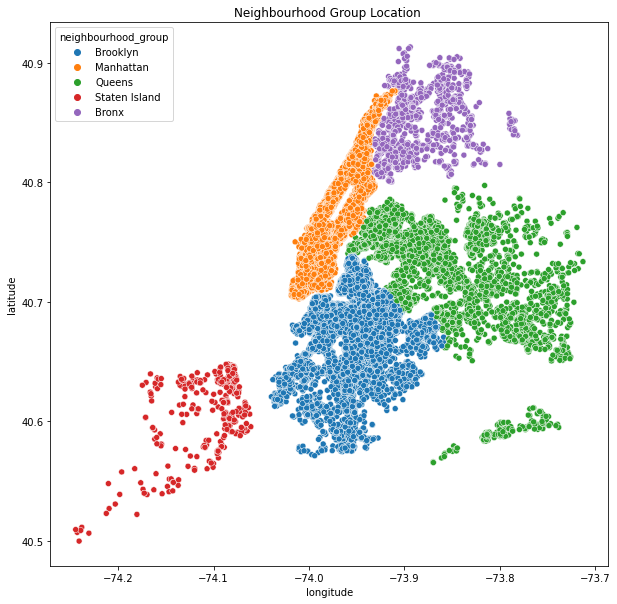

In [ ]:
#plotting the data 
title = 'Neighbourhood Group Location '
plt.figure(figsize=(10,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)

locating the neighbourhood groups on the map based on latitudes and longitudes 

# **Difference of traffic among different areas**

In [ ]:
#filtering the host listings within the neighbourhood groups
neighbour=df.neighbourhood_group.value_counts()

In [ ]:
neighbour

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

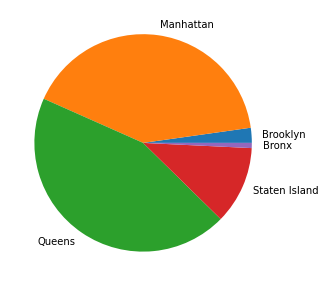

In [ ]:
#using the pie chart
fig = plt.figure(figsize =(10, 5))
listings=df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].count()
neighbourhood=df['neighbourhood_group'].unique()
plt.pie(listings,labels =neighbourhood)
plt.show()


Now we have a pie chart showing the total number of listings present in different neighbourhood areas of NYC

# **Hosts and Neighbourhood groups**

In [ ]:
#filtering the neighbourhood group using groupby operations 
hosts_areas = df.groupby(['host_name'])['neighbourhood_group'].count().reset_index()
hosts_areas.sort_values(by='neighbourhood_group', ascending=False).head(10)

,host_name,neighbourhood_group
7136,Michael,417
2377,David,403
9782,Sonder (NYC),327
4990,John,294
315,Alex,279
1357,Blueground,232
9214,Sarah,227
2278,Daniel,226
4841,Jessica,205
6685,Maria,204


# **ANALYSIS BASED ON PREDICTIONS**

# **Neighbourhood Group based on Price**

In [ ]:
#we find the price in decending order of the listings belonging to the neighbourhood group
area_price=df.groupby(['neighbourhood_group','calculated_host_listings_count'])['price'].count().reset_index()
area_price=area_price.sort_values('price',ascending=False)
area_price.head(5)

,neighbourhood_group,calculated_host_listings_count,price
41,Manhattan,1,14762
11,Brooklyn,1,13576
12,Brooklyn,2,3158
85,Queens,1,3145
42,Manhattan,2,2261


Text(0.5, 0, 'neighbourhood group')

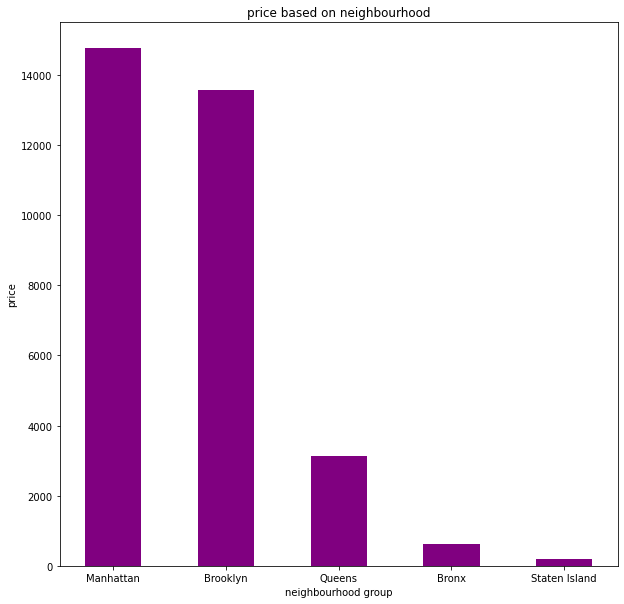

In [ ]:
neighbourhood_group=area_price['neighbourhood_group']
price=area_price['price']
#bar plot
fig=plt.figure(figsize=(10,10))
plt.bar(neighbourhood_group,price,width=0.5,color='purple')
plt.title('price based on neighbourhood')
plt.ylabel('price')
plt.xlabel('neighbourhood group')

We can observe clearly from the above bar graph that the overall  price of the total listings of Manhattan is more,the very next is Brooklyn and Staten Island is the least

# **Neighbourhood areas with  extreme low prices**

Text(0.5, 1.0, 'Neighberhood group based on price')

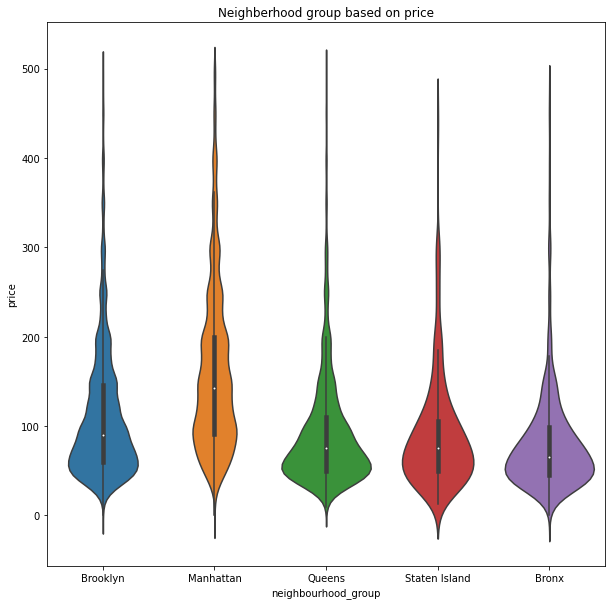

In [ ]:
#neighbourhood areas with extreme low price that is below five hundred
areaprice=df[df.price < 500] 
#violin plot
fig=plt.figure(figsize=(10,10))
viz_2=sns.violinplot(data=areaprice, x='neighbourhood_group', y='price')
viz_2.set_title('Neighberhood group based on price')

These are the listings of the neighbourhood group with prices less than five hunded which means extremely affordable.
From the violin plot it is evident that Queens and Bronx have the cheapest listings and manhattan corresponds to be the costliest of all.

## **Neighbourhood groups based on the reviews**

In [ ]:
#finding the neighbourhood group with reviews
areawise_reviews =df.groupby(['neighbourhood_group'])['number_of_reviews'].count().reset_index().head(20)
areawise_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


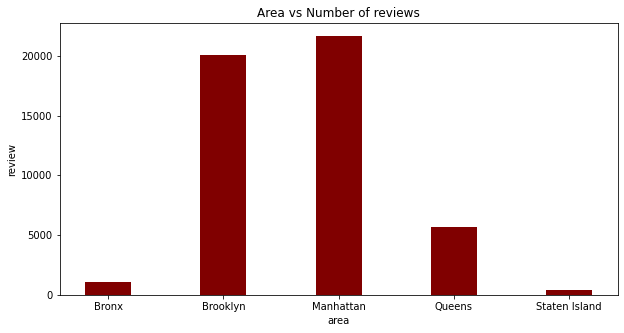

In [ ]:

area =areawise_reviews['neighbourhood_group']
review =areawise_reviews['number_of_reviews']
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(area, review, color ='maroon',width = 0.4)
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

Based on the reviews Manhattan tops, as it has more number of listings compared to the others and we had also known  this from the previous bar plot we created.Staten Island has less number of reviews.

# **Price based on Reviews**

In [ ]:
#filtering the reviews base on the price
price_review = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_review.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


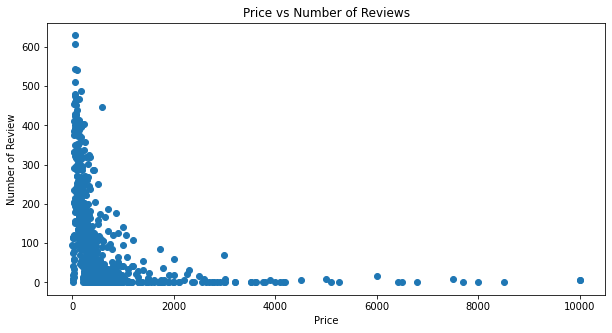

In [ ]:
area = price_review['price']
price = price_review['number_of_reviews']
#creating a scatter plot
fig = plt.figure(figsize = (10, 5))
plt.scatter(area, price)
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

We plotted this graph to just know how are the reviews based on the price.we observed that the listings with minimum price got more reviews than he costliest.This become quite helpful for the customers who wanted to book the costliest as well as cheapest listings available.

# **Corelation among the different columns of the data using heat map**

In [ ]:
#taking the desired colums to know about the correlation among them
area_reviews=df[['neighbourhood_group','price','minimum_nights','number_of_reviews','minimum_nights','availability_365',]]

In [ ]:
correlation=area_reviews.corr()
correlation

,price,minimum_nights,number_of_reviews,minimum_nights,availability_365
price,1.000000,0.042799,-0.047954,0.042799,0.081829
minimum_nights,0.042799,1.000000,-0.080116,1.000000,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,-0.080116,0.172028
minimum_nights,0.042799,1.000000,-0.080116,1.000000,0.144303
availability_365,0.081829,0.144303,0.172028,0.144303,1.000000


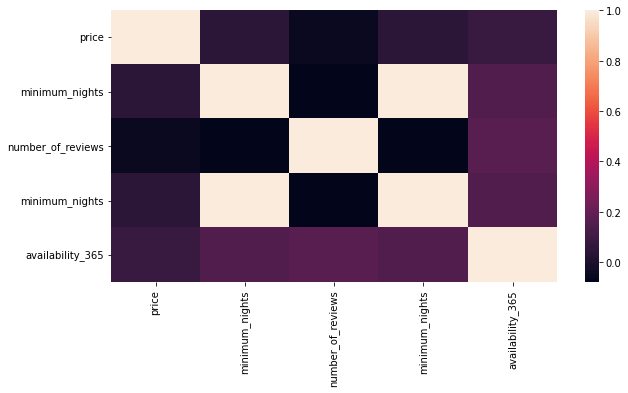

In [ ]:
#getting the correlation heat map
plt.figure(figsize=(10,5))
sns.heatmap(correlation)

# **Busiest host based on minimum stay of customers**

In [ ]:
#finding the busiest host by using minimum nights stayed by the customers
busiest_hosts = df.groupby(['host_name'])['minimum_nights'].count().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='minimum_nights', ascending=False).head()
busiest_hosts

,host_name,minimum_nights
7136,Michael,417
2377,David,403
9782,Sonder (NYC),327
4990,John,294
315,Alex,279


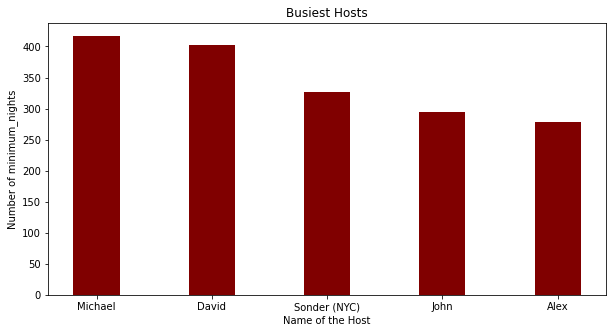

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['minimum_nights'] 
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(name, reviews, color ='maroon',width = 0.4)
plt.xlabel("Name of the Host")
plt.ylabel("Number of minimum_nights")
plt.title("Busiest Hosts")
plt.show()

This Bar plots depicts the busiest host in the NYC based on the minimum nights stayed by the customers.Michael is he busisest host and David next to Michael.

# **Busiest host based on the number of host listings  and minimum stay of customers**

In [ ]:
#getting the busiest host by using both listings and minimum nights
df1.groupby(['host_name','neighbourhood_group','calculated_host_listings_count'])['minimum_nights'].count().reset_index().sort_values(by='minimum_nights',ascending=False)


,host_name,neighbourhood_group,calculated_host_listings_count,minimum_nights
15304,Sonder (NYC),Manhattan,327,327
2153,Blueground,Manhattan,232,230
11355,Michael,Manhattan,1,149
3825,David,Manhattan,1,138
8497,Kara,Manhattan,121,121
...,...,...,...,...
7597,Jens,Brooklyn,1,1
7598,Jens,Manhattan,1,1
7599,Jensine,Manhattan,1,1
7600,Jenson,Manhattan,1,1


From this we got that Michael is the busiest host but when compared with the host listings in different areas of NYC, Sonder(NYC) is the busiest among all and Blueground,Michael were below sonder(NYC).

# **Types of rooms present in different neighbourhood group**

In [ ]:
#we have different types of rooms and we are now we want to fing where they are more at the neighbourhood group
room_type=df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack()#.reset_index()

In [ ]:
room_type

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0.5, 0, 'neighbourhood grop')

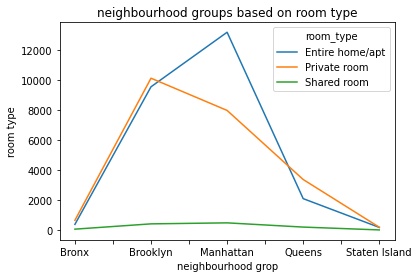

In [ ]:
#plotting the multiple line plot 
room_type.plot()
plt.title('neighbourhood groups based on room type')
plt.ylabel('room type')
plt.xlabel('neighbourhood grop')

Finally we have a multiple line plot visualising  different types of rooms that is Private room,Shared room,Entire home/apartment.
Its interesting that most people prefer Entirehome/apartment and no one is that interested in having a Shared room.
Again Manhattan has more Entire home/apartment that is why most of the customers prefer Manhattan apart from the others

# **SUMMARY AND CONCLUSION**
Through this exploratory data analysis and visualisation,we had several interesting insights into airbnb rental market and we will summarise the project in brief.
We found how many listings are there in a particular area then we get the details of the hosts which have more number of listings.
we analysed... which type of rooms are more preffered by the customers and
neighbourhood areas with more reviews and also the price related with the areas and reviews.
we found out who is the busiest host and how any listings that the busiest host contains.
we could have explored more but due to the time constrainted we are limited for this. 
After analysing the whole data we observed that Manhattan is the most preferred area as well as the costliest area but as the people prefer to stay here because it has more number of  Entire home/Apartment.
The people who prefer to stay in entire room/apartment are goin to stay bit longer in that particular neighbourhood only.
Most people dont prefer shared rooms.
Besides gaining the insights of airbnb market in NYC.Through the Capstone project we had also acquired sevaral technical way of coding and soft skills while discussing with the team.
We learned how to work on different libraries,how to visualiz the data by using different graphs,plots and charts and Working with the teammate gave an opportunity to collaborate and understand different viewpoints from eachother.